# **Importing libraries**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Reading the database train.csv**

In [ ]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

# **Reading the database test.csv**

In [ ]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

# **Exploring patterns**

In [ ]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women) # calculates the percentage of female passengers (in train.csv) who survived

In [ ]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men) # calculates the percentage of male passengers (in train.csv) who survived

From this,it is possible to see that almost 75% of the women on board survived, whereas only 19% of the men lived in this catastrophe. Since gender seems to be such a strong indicator of survival, the submission file in gender_submission.csv is not a bad first guess!

But at the end of the day, this gender-based submission bases its predictions on only a single column. So, by considering multiple columns, we can discover more complex patterns that can potentially yield better-informed predictions. Since it is quite difficult to consider several columns at once (or, it would take a long time to consider all possible patterns in many different columns simultaneously), we'll use machine learning to automate this for us.

# **The machine learning model**

We'll build what's known as a random forest model. This model is constructed of several "trees" (there are three trees in the picture below, but we'll construct 100!) that will individually consider each passenger's data and vote on whether the individual survived. Then, the random forest model makes a democratic decision: the outcome with the most votes wins!

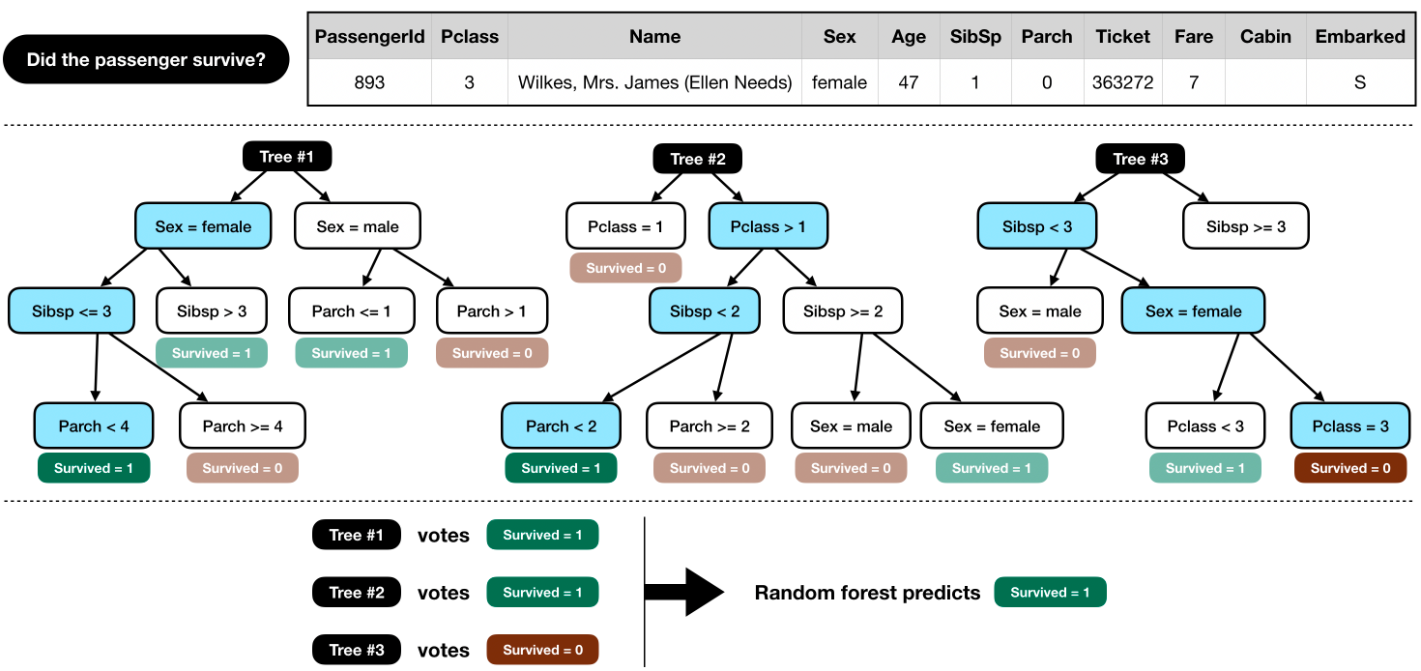

In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")